In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
sns.set()

Try both one and two dimensional

In [381]:
def gaussian(x, mu=0, sigma=1):
    constant = 1. / np.sqrt(2 * np.pi * sigma ** 2)
    return constant * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

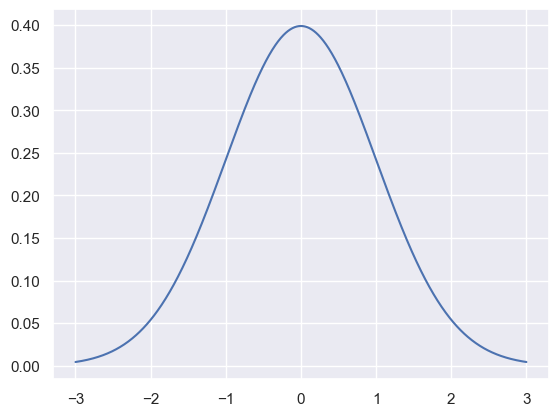

In [382]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, gaussian(x))

#### One dimensional

In [383]:
np.random.seed(123)
n_clusters = 2
n_dots = 5000
mus = 6 * np.random.randn(n_clusters)
sigmas = 4 * np.random.random(n_clusters)
X = np.concatenate([mu + sigma * np.random.randn(1 + n_dots // n_clusters) for mu, sigma in zip(mus, sigmas)])
X = X[:n_dots]
y = np.arange(n_dots * n_clusters) // n_dots
order = np.random.permutation(len(X))
X, y = X[order], y[order]

In [384]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [385]:
colors = np.array(sns.color_palette(as_cmap=True))[[1, 3, 6]]
# colors

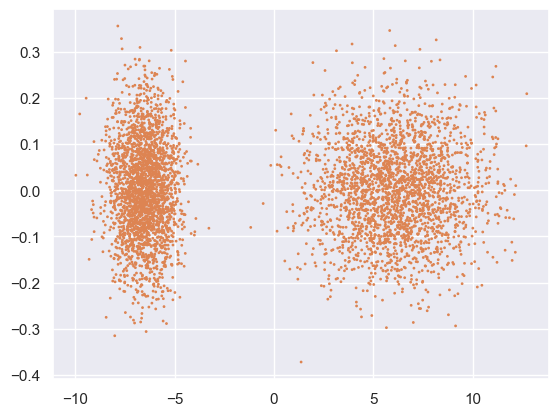

In [386]:
_, ax = plt.subplots()
ax.scatter(X, .1 * np.random.randn(n_dots), c=colors[y], lw=1, s=1)

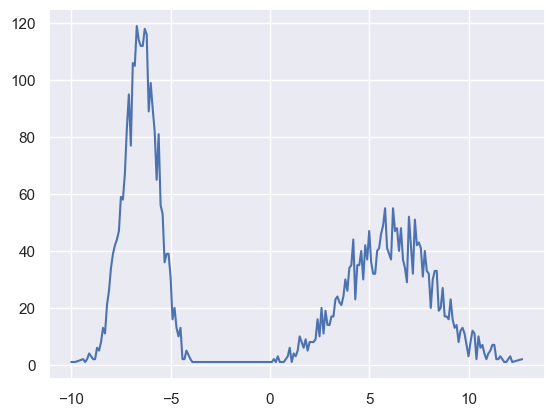

In [387]:
_, ax = plt.subplots()
vals, counts = np.unique(np.round(X, 1), return_counts=True)
ax.plot(vals, counts)

In [388]:
# predicting which points belongs where

In [427]:
# init
np.random.seed(1234)
mus_pred = 3 * np.random.randn(n_clusters)
sigmas_pred = 2 * np.random.random(n_clusters)

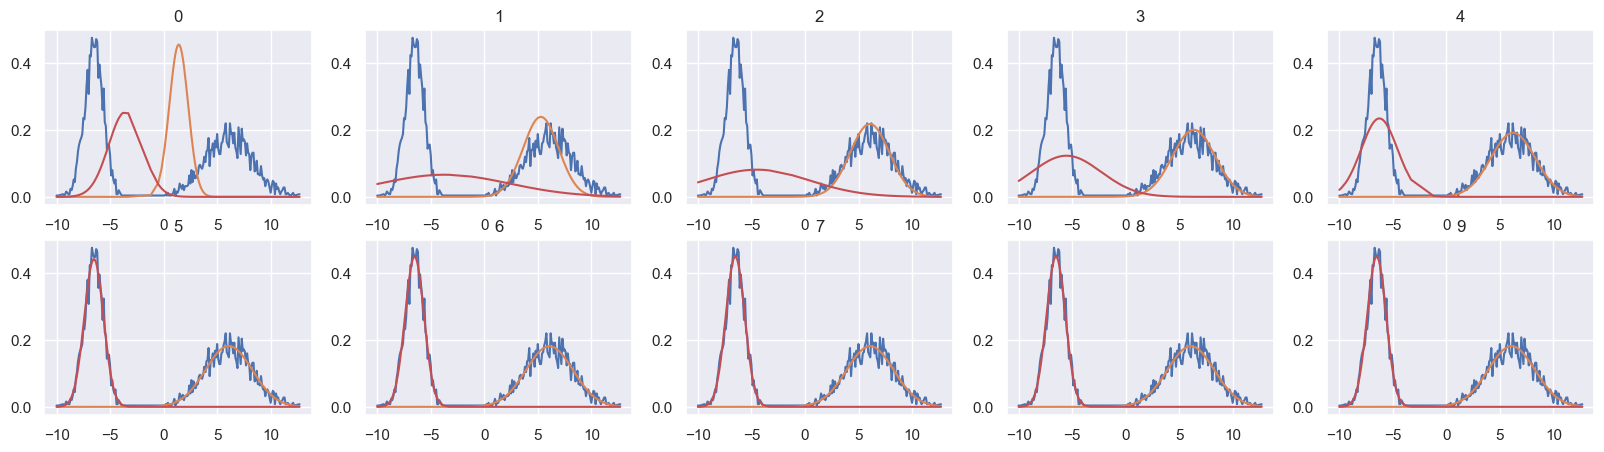

In [428]:
_, axs = plt.subplots(2, 5, figsize=(20, 5))
axs = axs.reshape(-1)

vals, counts = np.unique(np.round(X, 1), return_counts=True)
counts = counts / sum(counts) * 10 * 2  # scaling for 0.1 bins 

for i, ax in enumerate(axs):
    # plot
    ax.plot(vals, counts)
    for j, (mu, sigma) in enumerate(zip(mus_pred, sigmas_pred)):
        ax.plot(vals, gaussian(vals, mu, sigma), c=colors[j])    
    ax.set_title(i)
        
    # compute likelihoods and weights
    weights = np.array([gaussian(X, mu, sigma) for mu, sigma in zip(mus_pred, sigmas_pred)])
    total_weights = weights.sum(axis=0)
    weights = weights / total_weights
    # adjust parameters
    mus_pred = (X * weights).sum(axis=1) / weights.sum(axis=1)  # new mus and sigmas, based on likehoods
    sigmas_pred = np.sqrt(((X - mus_pred.reshape(-1, 1)) ** 2 * weights).sum(axis=1) / weights.sum(axis=1))


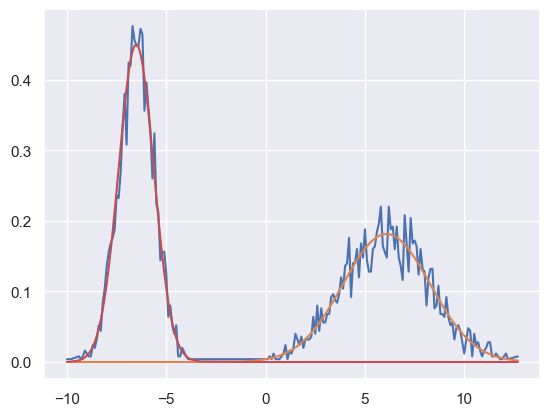

In [429]:
_, ax = plt.subplots()
vals, counts = np.unique(np.round(X, 1), return_counts=True)
counts = counts / sum(counts) * 10 * 2  # scaling for 0.1 bins 
ax.plot(vals, counts)
for i, (mu, sigma) in enumerate(zip(mus_pred, sigmas_pred)):
#     print(i)
    ax.plot(vals, gaussian(vals, mu, sigma), c=colors[i])

### sklearn solution

array([[-6.39452633],
       [ 3.5392297 ],
       [-6.71367828],
       ...,
       [ 6.77906386],
       [ 7.58715175],
       [-5.35442508]])

In [463]:
gm = GaussianMixture(n_components=n_clusters)
XX = X.reshape(-1, 1)  # make into 2D array, n rows x 1 feature
gm.fit(XX)
y_pred = gm.predict(XX)

In [464]:
mus_pred = gm.means_[:, 0]
sigmas_pred = np.sqrt(gm.covariances_)[:, 0, 0]

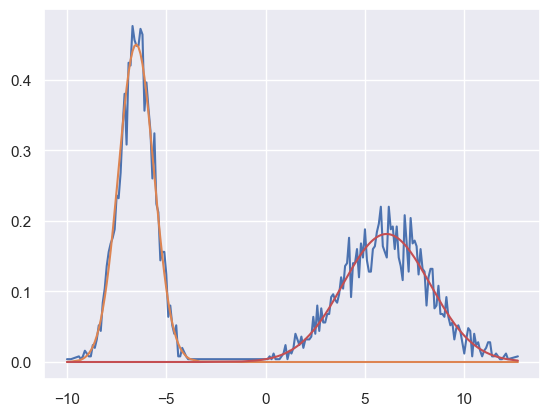

In [465]:
_, ax = plt.subplots()
vals, counts = np.unique(np.round(X, 1), return_counts=True)
counts = counts / sum(counts) * 10 * 2  # scaling for 0.1 bins 
ax.plot(vals, counts)
for i, (mu, sigma) in enumerate(zip(mus_pred, sigmas_pred)):
#     print(i)
    ax.plot(vals, gaussian(vals, mu, sigma), c=colors[i])